(<matplotlib.axes._subplots.AxesSubplot at 0x18252561bc8>,
 <matplotlib.image.AxesImage at 0x182530d0fc8>)

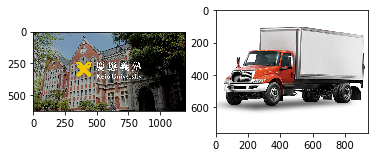

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

img_src = 'keio.jpg'
background_src = 'truck.jpg'

img = mpimg.imread(img_src)
background = mpimg.imread(background_src)
plt.subplot(1,2,1), plt.imshow(img)
plt.subplot(1,2,2), plt.imshow(background)

In [4]:
a = []
b = []
coordinate = {}
coordinate2 = {}
index = 0

cv2.namedWindow("lala")

img = cv2.imread(img_src)
billboard = cv2.imread(background_src)

def perspective(img, billboard):
    
    img_rows=img.shape[0]
    img_cols=img.shape[1]   
    
    rows=billboard.shape[0]
    cols=billboard.shape[1]

    
    pts1 = np.float32([[0,0],[img_cols,0],[0,img_rows],[img_cols,img_rows]])
    pts2 = np.float32([coordinate2['0'],coordinate2['1'],coordinate2['3'],coordinate2['2']])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(img,M,(cols,rows))
    return dst

def crop(img, perspective):
    
    rows=img.shape[0]
    cols=img.shape[1]
    channels=img.shape[2]
    mask=np.zeros(img.shape,dtype=np.uint8)
    roi_corners=np.array([[coordinate['0'],coordinate['1'],coordinate['2'],coordinate['3']]],dtype=np.int32)#左上，右上，右下，左下
    
    channel_count=channels
    ignore_mask_color = (255,)*channel_count 
    #创建mask层
    cv2.fillPoly(mask,roi_corners,ignore_mask_color)#cv2.fillPoly(img, area, color)
    mask = cv2.bitwise_not(mask)
    cv2.imwrite('mask.jpg',mask)
    #为每个像素进行与操作，除mask区域外，全为0
    masked_image=cv2.bitwise_and(img,mask)
    cv2.imwrite('crop.jpg',masked_image)
    
    masked_image = cv2.add(perspective,masked_image)
    cv2.imwrite('result.jpg',masked_image)
    return masked_image

def on_EVENT_LBUTTONDOWN(event, x, y, flags, param):
     # 按下鼠标左键
    lineThickness = 2
    global  index

    if event == cv2.EVENT_LBUTTONDOWN:
        xy = "%d,%d" % (x, y)
        a.append(x)
        b.append(y)
        
        
        cv2.circle(billboard, (x, y), 1, (0, 0, 255), thickness=5)
        cv2.putText(billboard, xy, (x, y), cv2.FONT_HERSHEY_PLAIN,
                    3.0, (0, 0, 255), thickness=3)
        if index > 0:
            cv2.line(billboard, (x, y), (a[index - 1], b[index - 1]), (0,255,0), lineThickness)
        if index == 3:
            cv2.line(billboard, (a[0], b[0]), (a[index], b[index]), (0,255,0), lineThickness)
         
        cv2.imshow("lala", billboard)
        print(index,x,y)
        
        
        if index < 4:
            coordinate[str(index)] = (x, y)
            coordinate2[str(index)] = [x, y]
            index = index + 1
        if index == 4:
            cv2.imwrite('ROI.jpg',billboard)
            index = 0
            

while True:
    cv2.setMouseCallback("lala", on_EVENT_LBUTTONDOWN)
    cv2.imshow("lala", billboard)

    k = chr(cv2.waitKey())
    if k == 'w':                       # toggle current image
        pers = perspective(img, billboard)
        #cv2.imwrite('perspective.jpg',pers)
        billboard = crop(billboard, pers)
        cv2.imshow("lala",billboard)
        
        a = []
        b = []
        coordinate = {}
        coordinate2 = {}
        
    elif k == 'a':
        billboard = cv2.imread(background_src)
    elif k == 27:
        break


cv2.destroyAllWindows()

0 531 125
1 904 175
2 901 408
3 522 395


ValueError: chr() arg not in range(0x110000)